In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [186]:
#Create a list of column names because the given file doesnt has the same
header=['sepal_length','sepal_width','petal_length','petal_width','class']

In [187]:
#Assign the csv file with the header as the column names
df=pd.read_csv('iris-missing.csv',names=header)

In [147]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,NaN,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [148]:
df.count()

sepal_length    150
sepal_width     148
petal_length    141
petal_width     142
class           150
dtype: int64

In [188]:
#Looks like some of the data are missing
df.isnull().sum()

sepal_length    0
sepal_width     2
petal_length    9
petal_width     8
class           0
dtype: int64

In [189]:
#Fill th empty cells with forward fill function
df=df.ffill(axis=0)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [191]:
#List the three class types
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [153]:
#Create a dictionary with the unique classes for mapping
class_dict={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [192]:
#create a new column with the mapped values for the classes
df['new_class']=df['class'].map(class_dict)

In [193]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,new_class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.5,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [194]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class,new_class
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,2.3,Iris-virginica,2


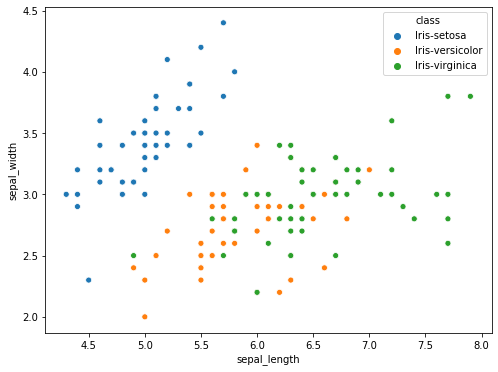

In [195]:
#Create a scatter plot for Sepal readings
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue=df['class'])

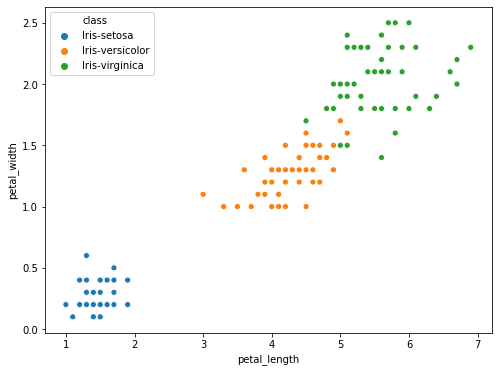

In [196]:
#Create a scatter plot for Petal readings
plt.figure(figsize=(8,6))
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue=df['class'])

In [197]:
#Assign X and y values
X=df.drop(['class','new_class'],axis=1).values
y=df['new_class'].values

In [198]:
X.shape

(150, 4)

In [199]:
y.shape

(150,)

# Prediction using KNN

In [200]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [201]:
#Import model selection from sklearn
from sklearn.model_selection import train_test_split

In [202]:
#Split the data into 80 and 20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [203]:
knn=KNeighborsClassifier(n_neighbors=1)#For K=1

In [204]:
#fit the training data into the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [205]:
#predict with a new value
knn.predict([[3.3,4.1,5.0,2.2]])

array([2], dtype=int64)

In [206]:
#Increase the k value 
knn3=KNeighborsClassifier(n_neighbors=3)#For K=3

In [208]:
knn3.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [209]:
knn3.predict([[3.3,4.1,5.0,2.2]])

array([2], dtype=int64)

In [210]:
#Calculate the score of the model
knn.score(X_test,y_test)

1.0

In [211]:
knn3.score(X_test,y_test)

1.0

In [212]:
#predict with the x_test values
predictions=knn.predict(X_test) 

In [213]:
#Import confusion matrix and classification report for comparing the real values and prediction
from sklearn.metrics import confusion_matrix,classification_report

In [214]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [215]:
confusion_matrix(y_test,predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Prediction using Naive bayes

In [216]:
#Import Gaussian naive bayes from sklearn
from sklearn.naive_bayes import GaussianNB
nvb=GaussianNB()

In [217]:
#Feature scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [218]:
#Fit the training data
nvb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [219]:
#Predict the test data
nv_predictions=nvb.predict(X_test)

In [182]:
nv_predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [183]:
print(classification_report(y_test,nv_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [184]:
confusion_matrix(y_test,nv_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)